In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [3]:
df = pd.read_csv("./data/인구현황.csv")

In [4]:
df.drop(index=0, inplace=True)
print(df)

        행정기관코드     행정기관      총인구수      세대수  세대당 인구   남자 인구수   여자 인구수  남여 비율
1   1100000000    서울특별시   9331828  4482063    2.08  4505355  4826473   0.93
2   2600000000    부산광역시   3266598  1570403    2.08  1589912  1676686   0.95
3   2700000000    대구광역시   2363629  1104130    2.14  1159601  1204028   0.96
4   2800000000    인천광역시   3021010  1373827    2.20  1509243  1511767   1.00
5   2900000000    광주광역시   1408422   658075    2.14   695224   713198   0.97
6   3000000000    대전광역시   1439157   687757    2.09   717291   721866   0.99
7   3100000000    울산광역시   1098049   495378    2.22   564888   533161   1.06
8   3600000000  세종특별자치시    390685   163432    2.39   194413   196272   0.99
9   4100000000      경기도  13694685  6058202    2.26  6882186  6812499   1.01
10  5100000000  강원특별자치도   1517766   764834    1.98   763025   754741   1.01
11  4300000000     충청북도   1591177   787756    2.02   809920   781257   1.04
12  4400000000     충청남도   2136574  1052129    2.03  1096128  1040446   1.05
13  52000000

In [9]:
print(df[["행정기관", "총인구수"]].sort_values(by="총인구수", ascending=False).head(5))

     행정기관      총인구수
9     경기도  13694685
1   서울특별시   9331828
2   부산광역시   3266598
16   경상남도   3228380
4   인천광역시   3021010


In [8]:
# [ (font.name, font.fname) for font in fm.fontManager.ttflist if 'Mal' in font.name ]
font_path = 'C:\\windows\\Fonts\\malgun.ttf'
#font의 파일정보로 font name 을 알아내기
font_prop = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_prop)

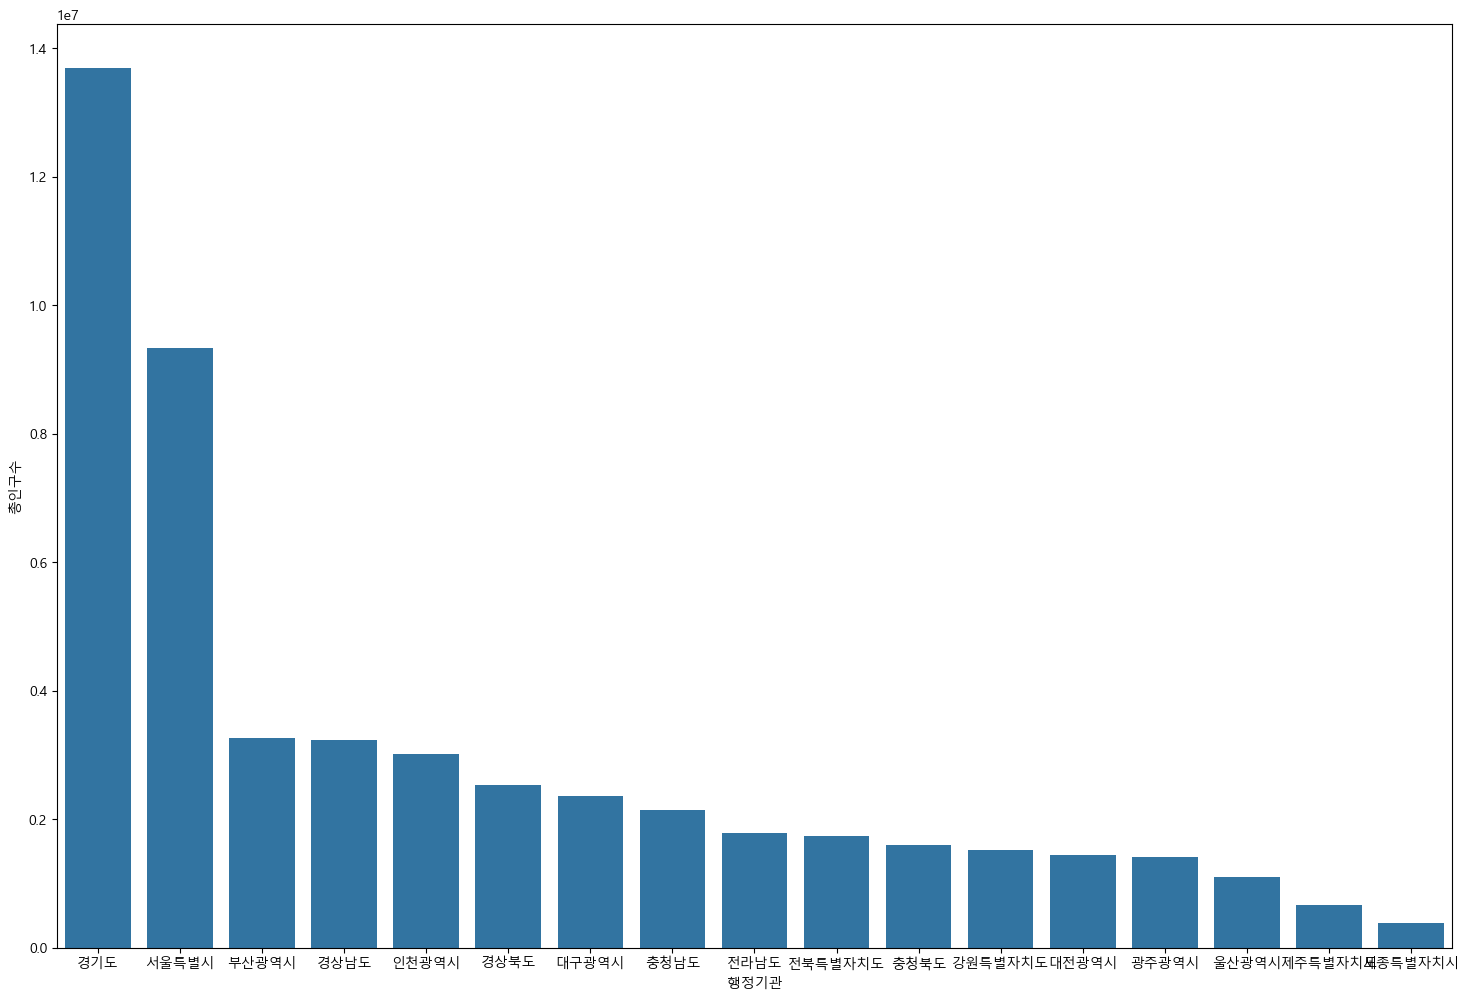

In [19]:
data = df[["행정기관", "총인구수"]].sort_values(by="총인구수", ascending=False)
figure, axes1 = plt.subplots(1,1)
figure.set_size_inches(18,12)
sns.barplot(x='행정기관', y='총인구수', data=data, ax=axes1)
plt.show()

In [5]:
print(df[["행정기관", "세대당 인구"]].sort_values(by="세대당 인구", ascending=False).head(5))

      행정기관  세대당 인구
8  세종특별자치시    2.39
9      경기도    2.26
7    울산광역시    2.22
4    인천광역시    2.20
3    대구광역시    2.14


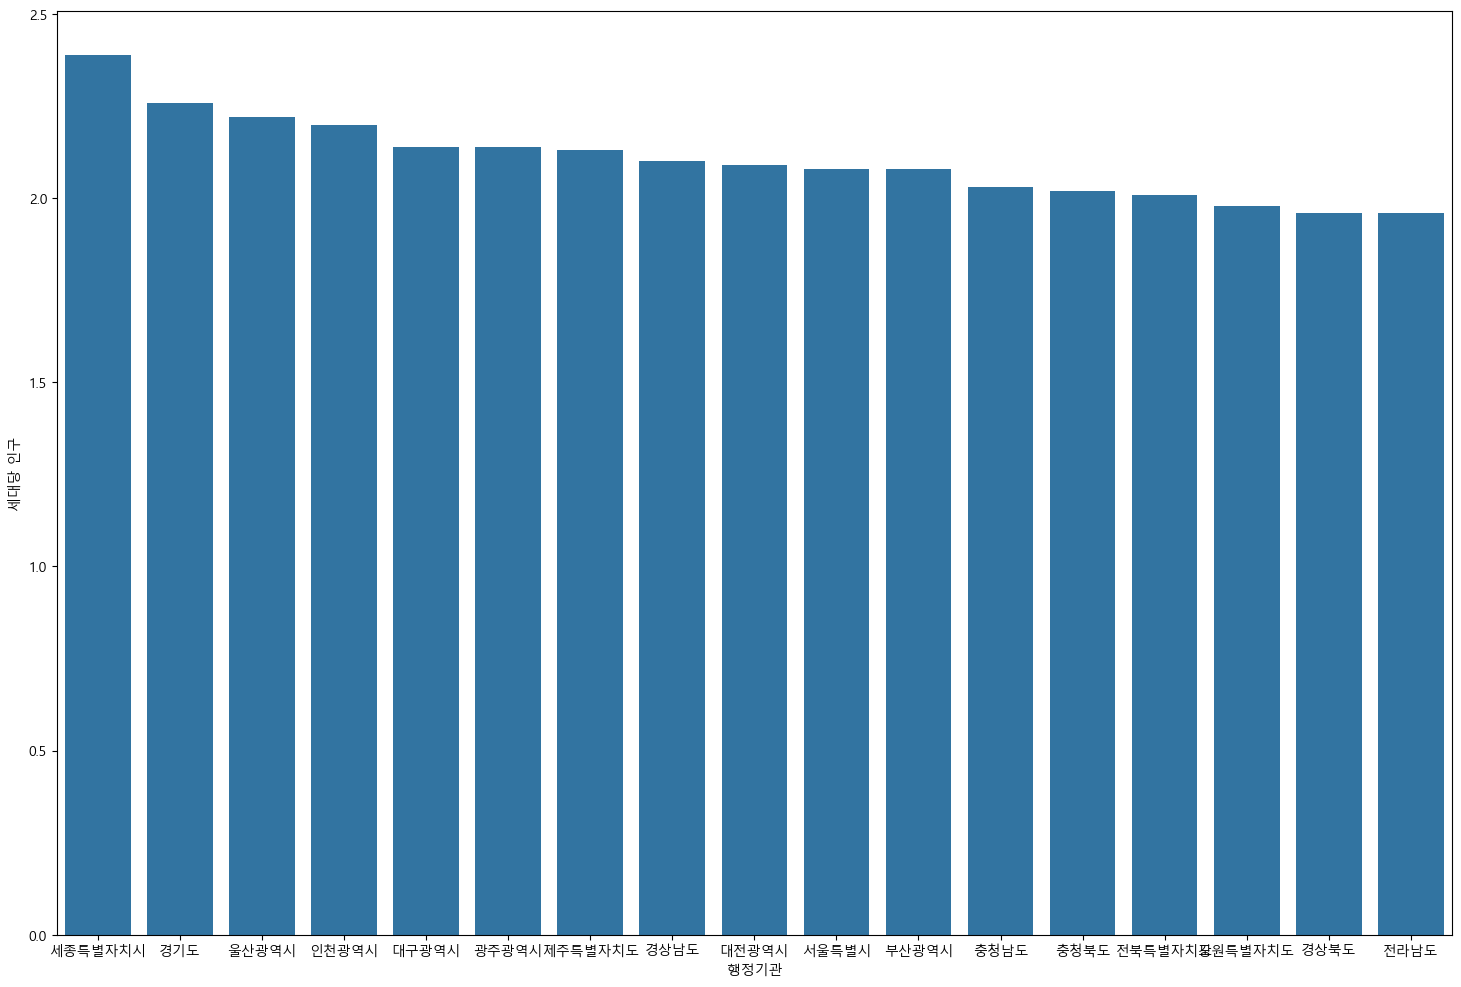

In [9]:
data = df[["행정기관", "세대당 인구"]].sort_values(by="세대당 인구", ascending=False)
figure, axes1 = plt.subplots(1,1)
figure.set_size_inches(18,12)
sns.barplot(x='행정기관', y='세대당 인구', data=data, ax=axes1)
plt.show()

In [11]:
print(df[["행정기관", "남여 비율"]].sort_values(by="남여 비율", ascending=False))

       행정기관  남여 비율
7     울산광역시   1.06
12     충청남도   1.05
11     충청북도   1.04
14     전라남도   1.02
15     경상북도   1.02
16     경상남도   1.02
10  강원특별자치도   1.01
9       경기도   1.01
17  제주특별자치도   1.00
4     인천광역시   1.00
13  전북특별자치도   0.99
6     대전광역시   0.99
8   세종특별자치시   0.99
5     광주광역시   0.97
3     대구광역시   0.96
2     부산광역시   0.95
1     서울특별시   0.93


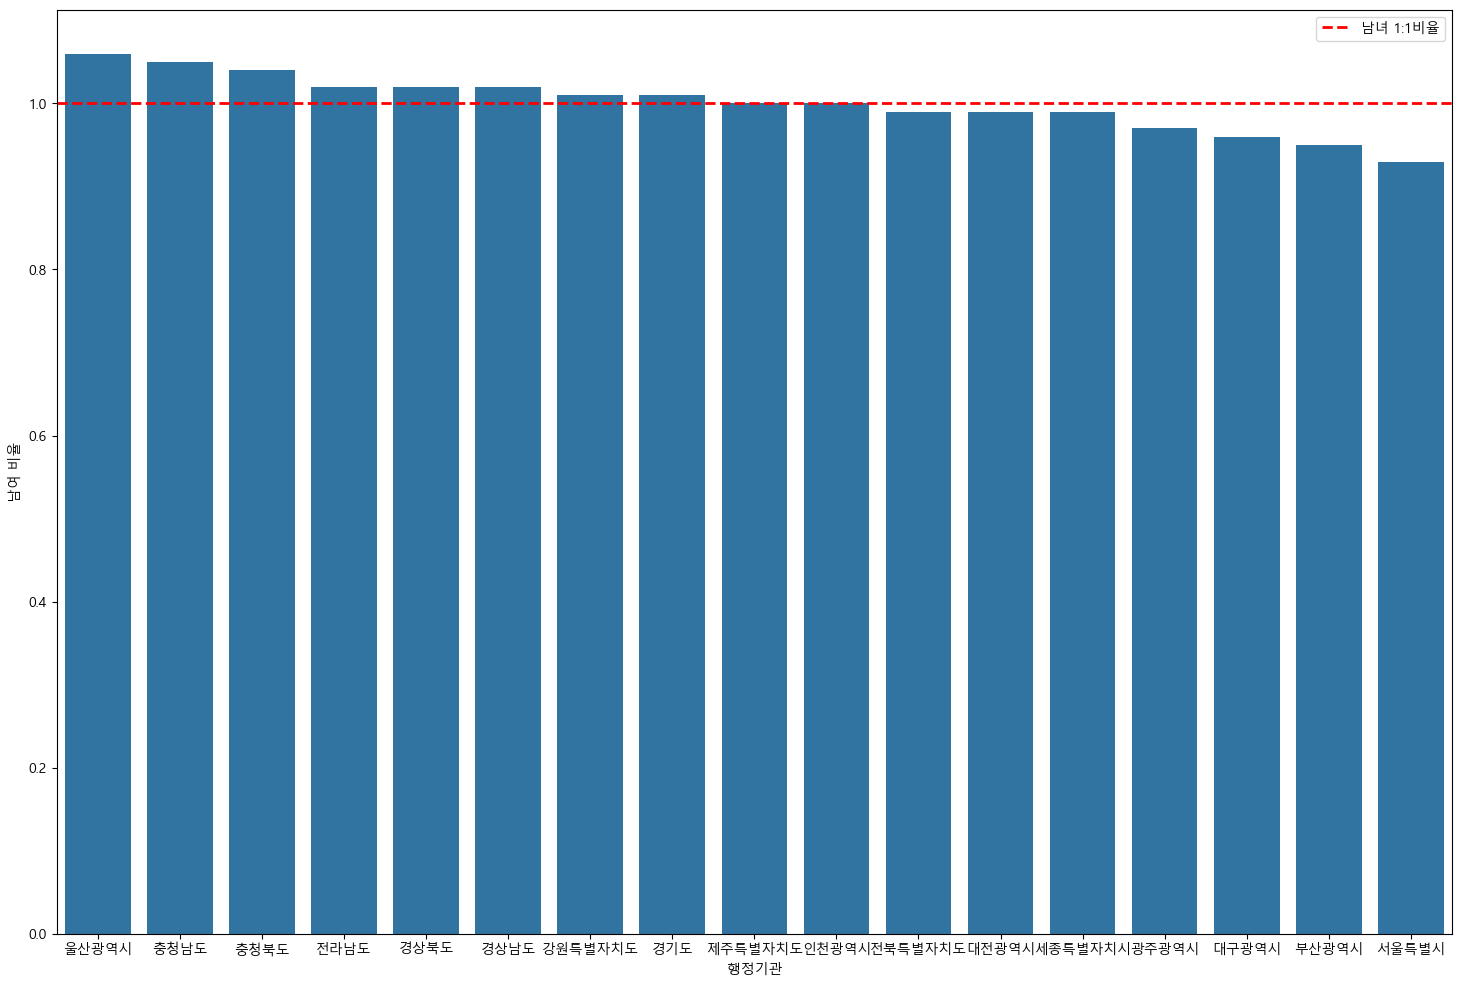

In [13]:
data = df[["행정기관", "남여 비율"]].sort_values(by="남여 비율", ascending=False)
avg  = df['남여 비율'].mean()
figure, axes1 = plt.subplots(1,1)

figure.set_size_inches(18,12)
sns.barplot(x='행정기관', y='남여 비율', data=data, ax=axes1)
plt.axhline(y=avg, color='red', linestyle='--', linewidth=2, label="남녀 1:1비율")
plt.legend()
plt.show()

In [14]:
df['남초여초'] = df['남여 비율'].apply(lambda x: '동일' if x == 1.0 else ('여초' if x < 1.0 else '남초'))
print(df[["행정기관", "남여 비율", "남초여초"]])

       행정기관  남여 비율 남초여초
1     서울특별시   0.93   여초
2     부산광역시   0.95   여초
3     대구광역시   0.96   여초
4     인천광역시   1.00   동일
5     광주광역시   0.97   여초
6     대전광역시   0.99   여초
7     울산광역시   1.06   남초
8   세종특별자치시   0.99   여초
9       경기도   1.01   남초
10  강원특별자치도   1.01   남초
11     충청북도   1.04   남초
12     충청남도   1.05   남초
13  전북특별자치도   0.99   여초
14     전라남도   1.02   남초
15     경상북도   1.02   남초
16     경상남도   1.02   남초
17  제주특별자치도   1.00   동일


In [24]:
avg = round(df['세대당 인구'].mean(),2)
print(f"전국 평균 세대당 인구수: {avg}")
print(df.loc[df["세대당 인구"] >= avg,["행정기관","세대당 인구"]].sort_values(by="세대당 인구", ascending=False))

전국 평균 세대당 인구수: 2.11
       행정기관  세대당 인구
8   세종특별자치시    2.39
9       경기도    2.26
7     울산광역시    2.22
4     인천광역시    2.20
3     대구광역시    2.14
5     광주광역시    2.14
17  제주특별자치도    2.13


In [33]:
print(df)

        행정기관코드     행정기관      총인구수      세대수  세대당 인구   남자 인구수   여자 인구수  남여 비율  \
1   1100000000    서울특별시   9331828  4482063    2.08  4505355  4826473   0.93   
2   2600000000    부산광역시   3266598  1570403    2.08  1589912  1676686   0.95   
3   2700000000    대구광역시   2363629  1104130    2.14  1159601  1204028   0.96   
4   2800000000    인천광역시   3021010  1373827    2.20  1509243  1511767   1.00   
5   2900000000    광주광역시   1408422   658075    2.14   695224   713198   0.97   
6   3000000000    대전광역시   1439157   687757    2.09   717291   721866   0.99   
7   3100000000    울산광역시   1098049   495378    2.22   564888   533161   1.06   
8   3600000000  세종특별자치시    390685   163432    2.39   194413   196272   0.99   
9   4100000000      경기도  13694685  6058202    2.26  6882186  6812499   1.01   
10  5100000000  강원특별자치도   1517766   764834    1.98   763025   754741   1.01   
11  4300000000     충청북도   1591177   787756    2.02   809920   781257   1.04   
12  4400000000     충청남도   2136574  1052129    2.03  

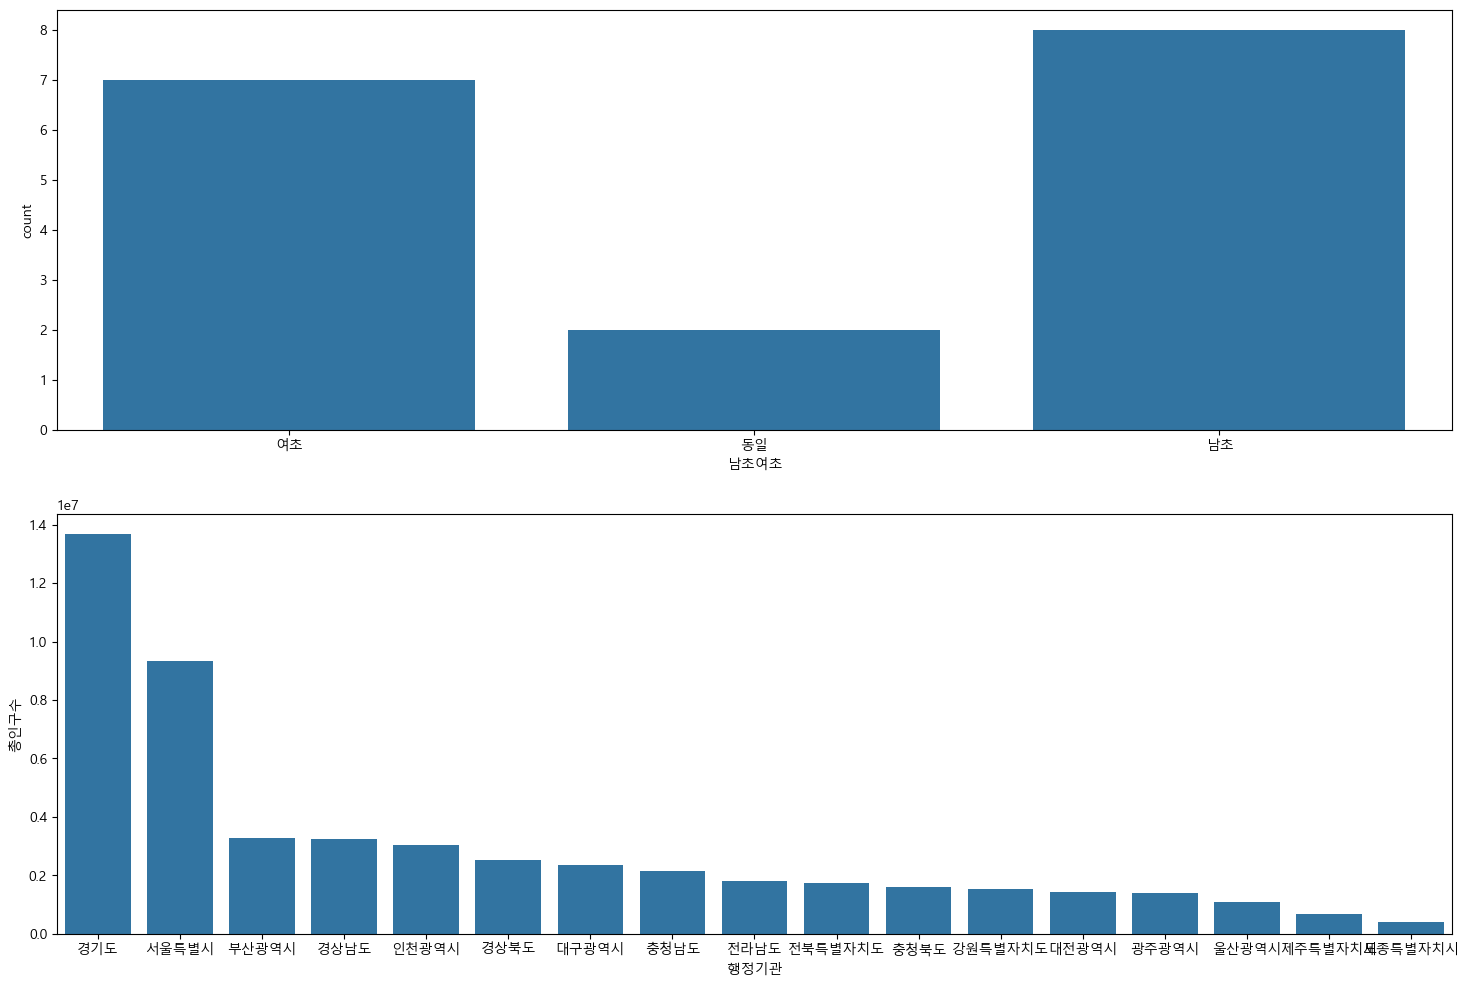

In [37]:
data = df[["행정기관", "총인구수"]].sort_values(by="총인구수", ascending=False)
figure, axes1 = plt.subplots(2,1)

figure.set_size_inches(18,12)
sns.countplot(x="남초여초",data=df, ax=axes1[0])
sns.barplot(x='행정기관', y='총인구수', data=data, ax=axes1[1])
plt.show()